<a href="https://colab.research.google.com/github/Kalashri21/Codsoft-Internship/blob/main/Codsoft_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tools and libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(2)

,v1,v2
1553,ham,Ok how you dear. Did you call chechi
4607,ham,We live in the next &lt;#&gt; mins


In [ ]:
df.rename(columns={'v1':'result','v2':'message'},inplace=True)

In [ ]:
df.sample(2)

,result,message
988,ham,Yun ah.the ubi one say if Ì_ wan call by tomor...
5436,ham,Mode men or have you left.


In [ ]:
#changing the result coulm values to 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['result']=encoder.fit_transform(df['result'])


In [ ]:
df.head()

,result,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

result     0
message    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
#dropping duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

**EDA**

<Axes: xlabel='result'>

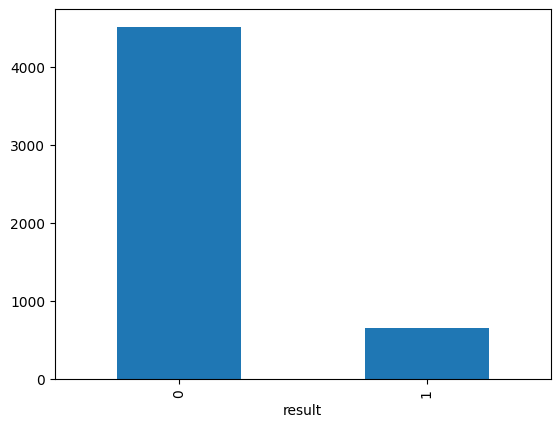

In [ ]:
df['result'].value_counts().plot.bar()

In [ ]:
df.sample(2)

,result,message
4289,0,"For you information, IKEA is spelled with all ..."
1432,0,Thanks for ve lovely wisheds. You rock


In [ ]:
import re

In [ ]:
df['num_characters']=df['message'].apply(len)
df['num_words']=df['message'].apply(lambda x:len(x.split(' ')))
df['num_sentences']=df['message'].apply(lambda x:re.split(r'[.?]', x))

In [ ]:
df.sample(2)

,result,message,num_characters,num_words,num_sentences
1914,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,158,30,[New TEXTBUDDY Chat 2 horny guys in ur area 4 ...
598,0,Will do. Was exhausted on train this morning. ...,87,17,"[Will do, Was exhausted on train this morning..."


In [ ]:
df['message'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
df['num_sentences'][1]

['Ok lar', '', '', ' Joking wif u oni', '', '', '']

In [ ]:
len(list(filter(None, df['num_sentences'][1])))

2

In [ ]:
df['num_sentences']=df['num_sentences'].apply(lambda x:len(list(filter(None,x))))

In [ ]:
df.head()

,result,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

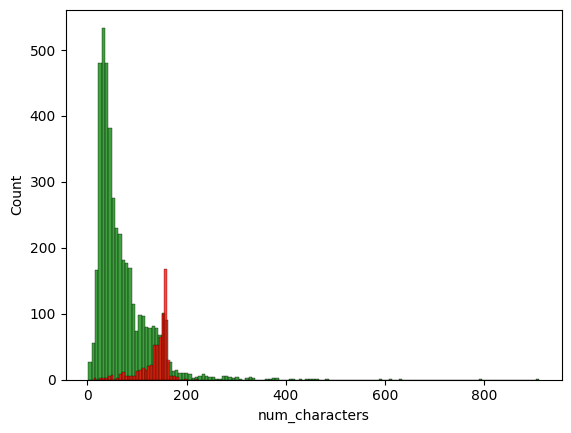

In [ ]:
#plot on basis on number of characters
sns.histplot(df[df['result']==0]['num_characters'],color='green')
sns.histplot(df[df['result']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

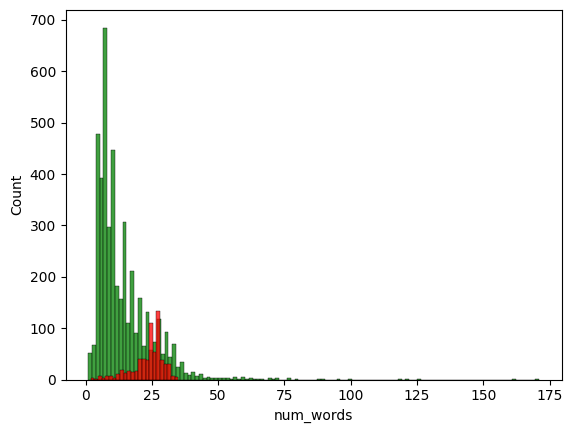

In [ ]:
# plot on basis on number of words
sns.histplot(df[df['result']==0]['num_words'],color='green')
sns.histplot(df[df['result']==1]['num_words'],color='red')

In [ ]:
#plot on basis on number of sentences
sns.histplot(df[df['result']==0]['num_sentences'],color='green')
sns.histplot(df[df['result']==1]['num_sentences'],color='red')

In [ ]:
df_excluded = df.drop(columns=['message'])

<Axes: >

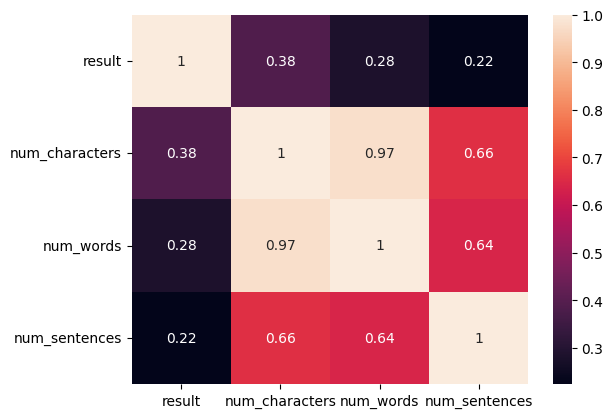

In [ ]:
sns.heatmap(df_excluded.corr(),annot=True)

**Model Building**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=2500)

In [ ]:
X=tfid.fit_transform(df['message']).toarray()

In [ ]:
y=df['result'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

Model ==> Gaussian Naive Bayes
Accuracy ==> 0.89
Precision ==> 0.56


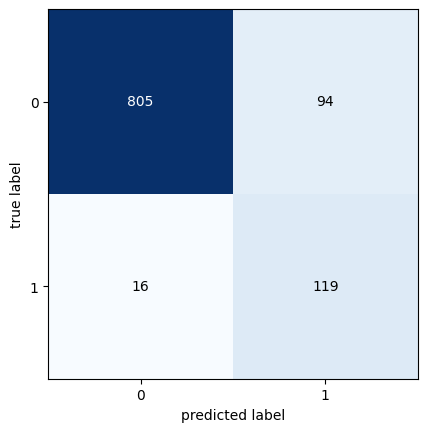



Model ==> Multinomial Naive Bayes
Accuracy ==> 0.97
Precision ==> 1.00


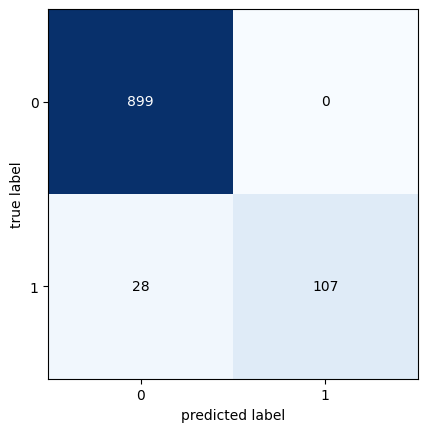



Model ==> Bernoulli Naive Bayes
Accuracy ==> 0.99
Precision ==> 0.99


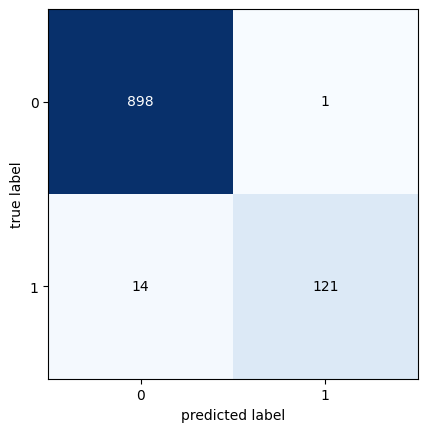



Model ==> Support Vector
Accuracy ==> 0.98
Precision ==> 0.97


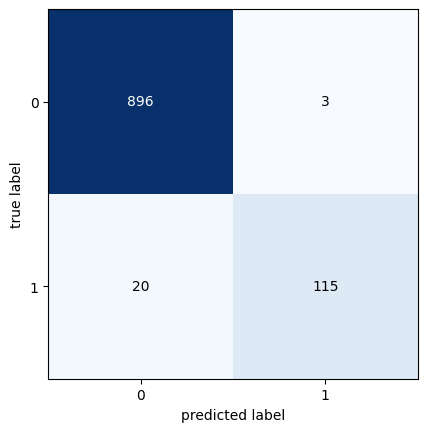



Model ==> Logistic regression
Accuracy ==> 0.95
Precision ==> 0.93


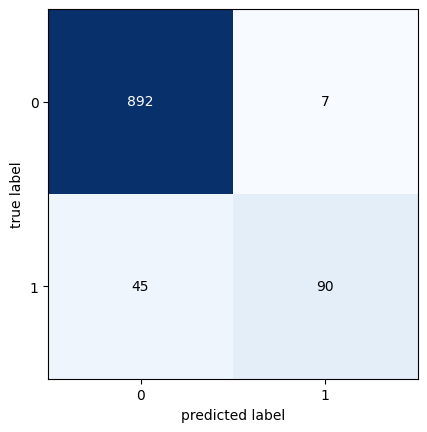



Model ==> Random Forest
Accuracy ==> 0.97
Precision ==> 0.99


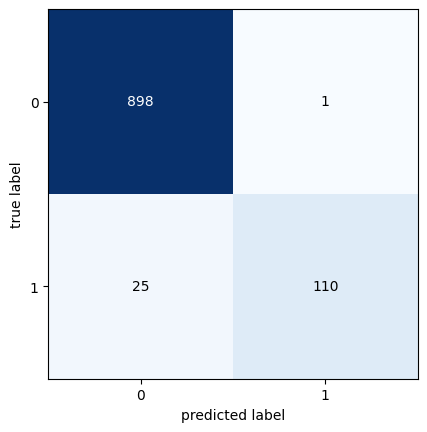



Model ==> Decision Trees
Accuracy ==> 0.96
Precision ==> 1.00


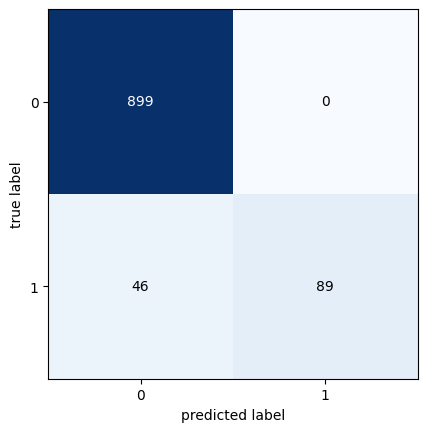



Model ==> XGBClassifier
Accuracy ==> 0.98
Precision ==> 0.97


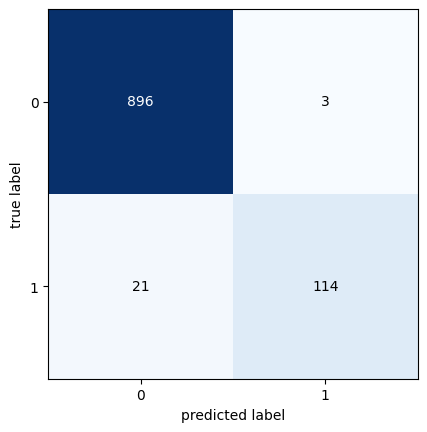



Model ==> GradientBoostingClassifier
Accuracy ==> 0.96
Precision ==> 0.98


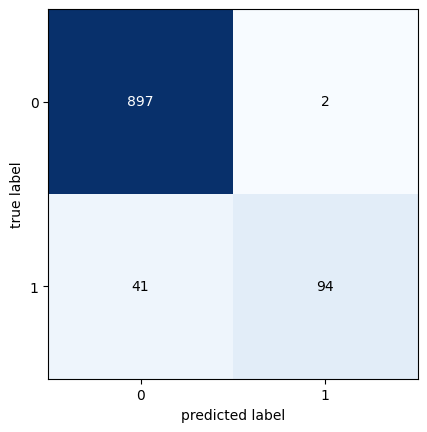

In [ ]:
models = [[GaussianNB(), "Gaussian Naive Bayes"],
          [MultinomialNB(), "Multinomial Naive Bayes"],
          [BernoulliNB(), "Bernoulli Naive Bayes"],
          [SVC(kernel='sigmoid',gamma=1.0), "Support Vector"],
          [LogisticRegression(solver='liblinear',penalty='l1'), "Logistic regression"],
          [RandomForestClassifier(n_estimators = 50,random_state=2), "Random Forest"],
          [DecisionTreeClassifier(max_depth = 5), "Decision Trees"],
          [XGBClassifier(n_estimators=50, random_state=2), "XGBClassifier"],
          [GradientBoostingClassifier(n_estimators=50, random_state=2),"GradientBoostingClassifier"]]

for i in models:
    name = i[1]
    model = i[0]
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred1)
    precision = precision_score(y_test, y_pred1)

    print(f'Model ==> {name}')
    print(f'Accuracy ==> {accuracy:.2f}')
    print(f'Precision ==> {precision:.2f}')
    cnf = confusion_matrix(y_test,y_pred1)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

**Using Multinomial Naive Bayes as Precision score is 1**

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9729206963249516
1.0
